<a href="https://colab.research.google.com/github/VivekAlamwar/new-repo/blob/main/Uber_Cab_RCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file=pd.read_csv("/content/uber-data.csv")

In [ ]:
file.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#Data Preparation and Basic Check

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
file.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [ ]:
file['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [ ]:
#Converting object type of drop, request timestamp to datetime stamp

In [ ]:
file['Request timestamp']=pd.to_datetime(file['Request timestamp'])

In [ ]:
file['Drop timestamp']=pd.to_datetime(file['Drop timestamp'])

In [ ]:
file.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
#Checkin the duplicate entries in rows

In [ ]:
file.duplicated().sum()

0

In [ ]:
#checking Null % of rows in data
#Drive id and drop timestamp have highest % of null values

In [ ]:
100*file.isnull().sum()/file.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

Assumptions:
1. All cancelled Rides are cancelled by Driver.
2. One route anaysis: Airport to City and wise versa.

Two scenario:

1. Car is not available: Driver id as well as drop timestamp is null
2. Driver denied trip: Driver id is available and drop timestamp is null.


##Cancelled Rate

In [ ]:
file['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [ ]:
Cancelled_rate=100*file[file['Status']=='Cancelled'].shape[0]/file.shape[0]

In [ ]:
#18.7 % cases Car getting Cancelled

In [ ]:
Cancelled_rate

18.739807264640476

##Car Not Available

In [ ]:
#39.2 % cases car was not available

In [ ]:
Car_not_available=file[file['Status']=='No Cars Available'].shape[0]

In [ ]:
100*Car_not_available/file.shape[0]

39.288361749444036

##Trip Not Initiated

In [ ]:
#Combining the Cancellated rate and car not avalible. In total 58 % cases are trip was not Intitated.

In [ ]:
Trip_not_initiate=file[~(file['Status']=='Trip Completed')].shape[0]

In [ ]:
100*Trip_not_initiate/file.shape[0]

58.028169014084504

In [ ]:
#Univariate Analysis

In [ ]:
#checking the distribution of the request hour

In [ ]:
file['Request hour']=file['Request timestamp'].dt.hour

<Axes: xlabel='Request hour', ylabel='count'>

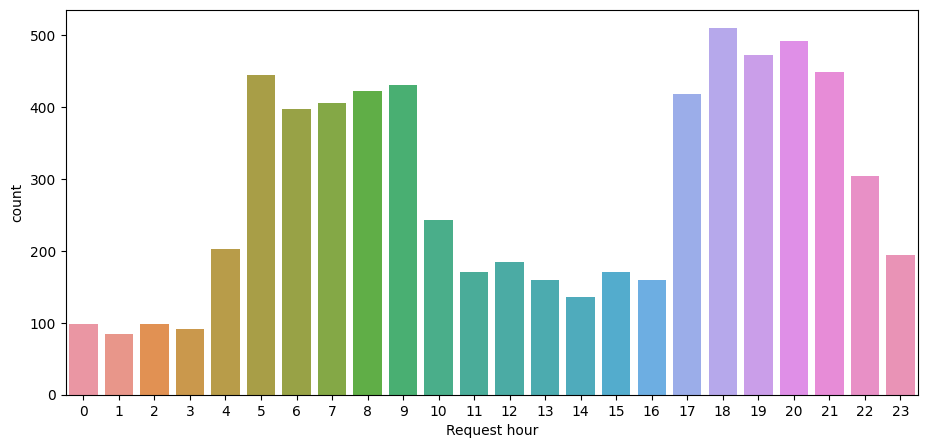

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(x=file['Request hour'])

In [ ]:
#Bivariate analysis,
#Checking the request hour distribution with status

The peak request are happening between (5AM-9AM) and (5PM-9PM)

<Axes: xlabel='Request hour', ylabel='count'>

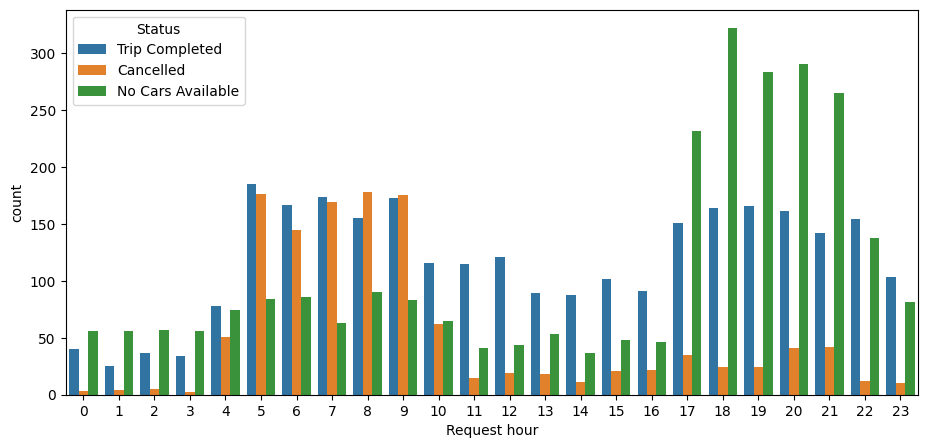

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(x=file['Request hour'],hue=file['Status'])

1. Most cancellation are happening in morning between (5AM-9AM)
2. Most of the cars are unavailable in evening between (5PM-9PM)
3. Nearly same trips are getting completed in the evening and morning.



In [ ]:
file_airport=file[file['Pickup point']=='Airport']

<Axes: xlabel='Request hour', ylabel='count'>

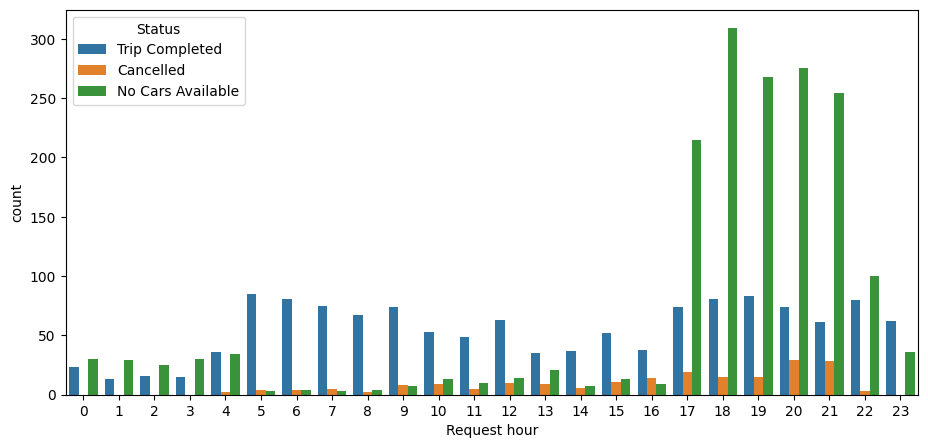

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(x=file_airport['Request hour'],hue=file_airport['Status'])

At Airport between 5PM-9PM  cabs are not available but there is high demand
High demand for cars from airport to city at the evening

In [ ]:
file_City=file[file['Pickup point']=='City']

<Axes: xlabel='Request hour', ylabel='count'>

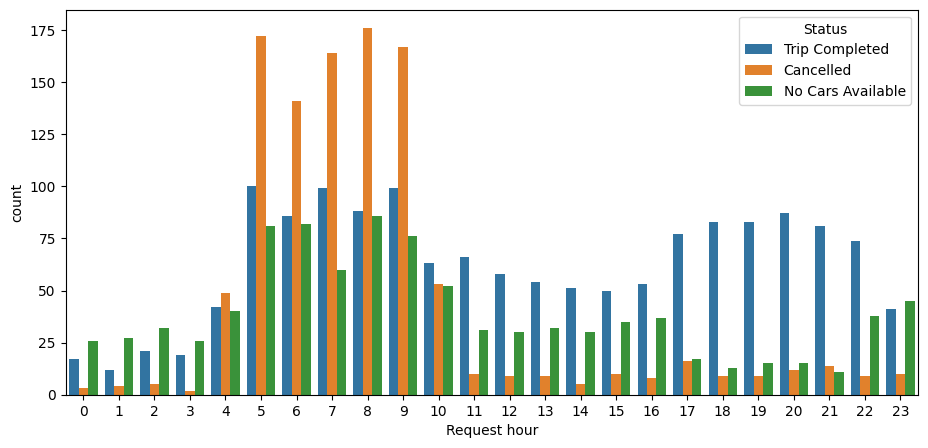

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(x=file_City['Request hour'],hue=file_City['Status'])

In the City Trip are getting cancelled betweeen 5AM-9AM
Means In the morning car drivers are not ready to go to airport and cancelling the rides

##Summary

1. Most cancellation are happening in morning between (5AM-9AM)
2. Most of the cars are unavailable in evening between (5PM-9PM)
3. At Airport between 5PM-9PM  cabs are not available but there is high demand
4. In the City Trip are getting cancelled betweeen 5AM-9AM



##Finding Problem
- Driver not willing to accept the ride from city to airport in the morning as the probability of getting the trip from airport back to city is less as per the data.
- Since the willingness of driver to travel to airport in the morning is less so the less drivers are taking trip in the morning from city to airport and hence less number of driver are available in the evening at airport resulting into shortage of cabs at Airport in the evening.
- Unavailability of cabs at airport creating huge business loss. As People pay more on cabs while travelling from airport to city as compare to other trip.

##Suggest the Fix
- Increase Incetive
 - Chagre less platform fees to driver if they are taking morning trip from city to airport.
 - Incentivize the driver if they are available at airport in evening time. This will reduce the cab unavailability scenario.

- Provide rest station or refreshment station for cab driver so they can wait till evening at airport
-Provide Electric Charging station for electric vehicals at airport.